<IPython.core.display.Javascript object>


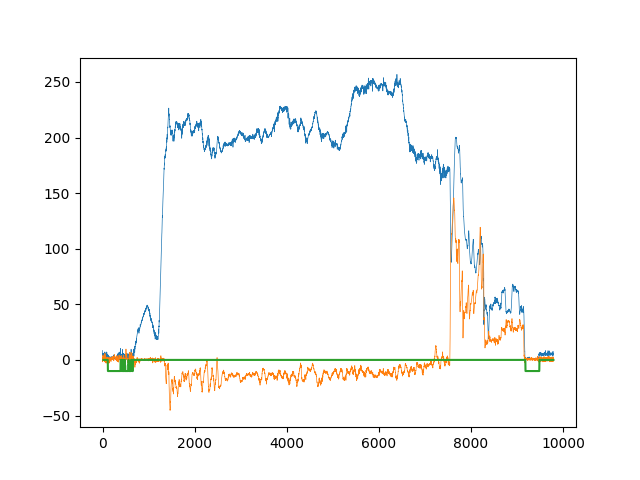

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt

import pandas
from sklearn.tree import DecisionTreeClassifier

df = pandas.read_csv('../data/train/ground/base-big-ws-1.csv')

df['h_speed'] = (df['velN']**2 + df['velE']**2) ** 0.5 * 3.6
df['v_speed'] = df['velD'] * 3.6
df['altitude_chng'] = (df['hMSL'].rolling(window=50).std()).bfill()
df['is_ground'] = (df['class'] == 1).astype('float')

X_train = df[['h_speed', 'v_speed', 'altitude_chng']]
y_train = df['is_ground']

ground_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
ground_classifier.fit(X_train, y_train)

df = pandas.read_csv('../data/test/#6294 17-15-08.CSV')
df['h_speed'] = (df['velN']**2 + df['velE']**2) ** 0.5 * 3.6
df['v_speed'] = df['velD'] * 3.6
df['altitude_chng'] = (df['hMSL'].rolling(window=50).std()).bfill()

df['is_ground'] = ground_classifier.predict(df[['h_speed', 'v_speed', 'altitude_chng']])
df['is_ground'] = df['is_ground'].rolling(window=20).median()

plt.figure()
plt.plot(df['h_speed'], linewidth=0.5)
plt.plot(df['v_speed'], linewidth=0.5)
plt.plot(df['is_ground'] * -10)

plt.show()